# **K-Nearest Neighbors (KNN)**

In [4]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [5]:
# Step 2: Generate a more balanced and separable dataset using make_classification
# We increase the number of informative features and samples
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, flip_y=0.01, random_state=42)

In [6]:
# Step 3: Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Step 4: Use Grid Search to find the best value for k (from 1 to 10)
param_grid = {'n_neighbors': range(1, 11)}  # Try k from 1 to 10
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)})

In [8]:
# Step 5: Get the best value of k
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value for k: {best_k}")

Best value for k: 3


In [9]:
# Step 6: Train KNN with the best k and make predictions
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

In [10]:
# Step 7: Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={best_k}: {accuracy:.2f}")

Accuracy with k=3: 0.96


In [11]:
# Step 8: Visualize the accuracy for different values of k
k_values = range(1, 11)
accuracies = []


In [12]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

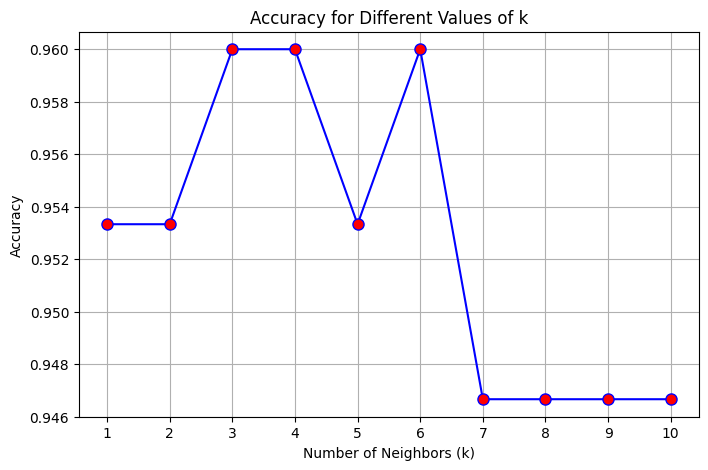

In [13]:
# Plot the accuracies for each value of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', markerfacecolor='r', markersize=8)
plt.title('Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# **Support Vector Machines (SVM)**

In [15]:
# Step 1: Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Step 2: Load the Wine dataset
# The Wine dataset contains chemical analysis of wines classified into three categories
wine = load_wine()
X = wine.data  # Features (chemical properties)
y = wine.target  # Target labels (wine categories)

In [17]:
# Step 3: Use only two classes (binary classification) and two features for simplicity
X = X[y != 2]  # Remove class 2 to make it binary classification (class 0 vs class 1)
y = y[y != 2]  # Update the labels accordingly
X = X[:, :2]  # Use only the first two features for visualization

In [18]:
# Step 4: Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Step 5: Train an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [20]:
# Step 6: Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [21]:
# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM: {accuracy:.2f}")

Accuracy of SVM: 1.00


In [22]:
# Step 8: Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[20  0]
 [ 0 19]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        19

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [23]:
# Step 9: Visualize the decision boundary
# Create a mesh grid for plotting decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

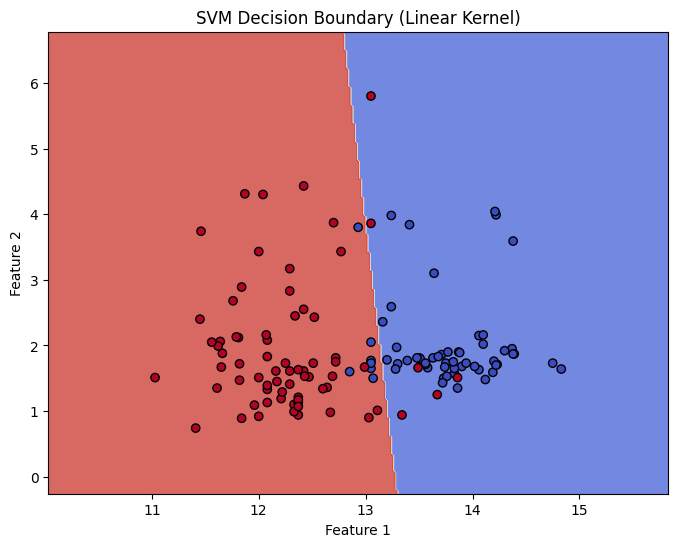

In [24]:
# Plot decision boundaries
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()